<a href="https://colab.research.google.com/github/Devkhiran/EDA-Hotel-Booking/blob/main/Dev_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [83]:
# IMPORTING LIBRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [84]:
# MOUNTING GOOGLE DRIVE

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
# IMPORTING DATASET

path = '/content/drive/MyDrive/Colab Notebooks/Projects/Hotel Bookings/Hotel Bookings.csv'
hbdf = pd.read_csv(path)


In [86]:
# TOP 5 ROWS OF THE DATA SET

hbdf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [87]:
# BOTTOM 5 ROWS OF THE DATA SET

hbdf.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [88]:
# DATA FRAME INFO

hbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [89]:
# STATISTICS INFORMATION OF NUMERICAL COLUMNS FROM THE DATA FRAME

hbdf.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [90]:
# NUMBERS OF COLUMNS AND NUMBERS OF ROWS

hbdf.shape

(119390, 32)

In [91]:
# TRANSPOSING THE DATA

hbdf.T

,0,1,2,3,4,5,6,7,8,9,...,119380,119381,119382,119383,119384,119385,119386,119387,119388,119389
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
lead_time,342,737,7,13,14,14,0,9,85,75,...,44,188,135,164,21,23,102,34,109,205
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,...,35,35,35,35,35,35,35,35,35,35
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,...,31,31,30,31,30,30,31,31,31,29
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3,...,3,3,4,4,5,5,5,5,5,7
adults,2,2,1,1,2,2,2,2,2,2,...,2,2,3,2,2,2,3,2,2,2


In [92]:
# COLUMNS NAME

col_name = hbdf.columns
col_name 

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [93]:
# TOTAL NUMBER OF MISSING VALUE IN THE DATA FRAME(DF)

total_missing_value = sum(pd.to_numeric(hbdf.isnull().sum()))
total_missing_value

129425

**DATA CLEANING**






In [94]:
# WHICH COLUMN HAVE MISSING VALUES

hbdf.isna().any()[lambda x: x].index.tolist()

['children', 'country', 'agent', 'company']

In [95]:
# NUMBER OF NULL VALUE IN EACH COLUMN

hbdf.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**THESE ARE THE COLUMNS WHICH HAVE NULL VALUES:**



1.   children 
2.   country
3.   agent
4.   company




In [96]:
miss_val = hbdf.isna().any()[lambda x: x].index.tolist()

In [97]:
col_miss_v = hbdf[miss_val]

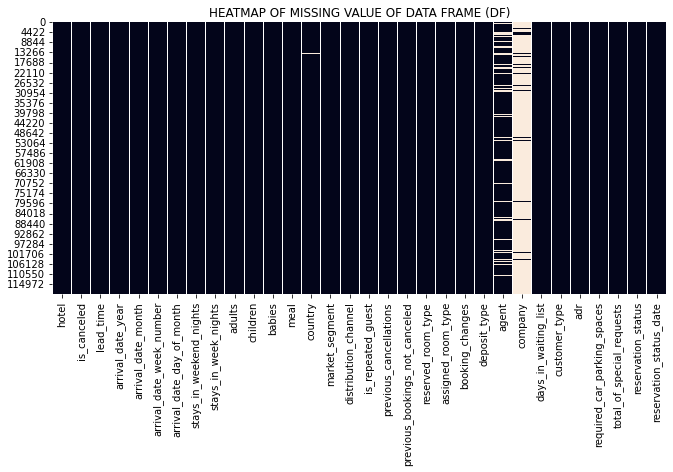

In [98]:
# HEATMAP SHOWING MISSING VALUE WITH COLUMN WHICH HAVE MISSING COLUMN

plt.figure(figsize = (11,5))
sns.heatmap(hbdf.isnull(), cbar=False)
plt.title("HEATMAP OF MISSING VALUE OF DATA FRAME (DF)")
plt.show()

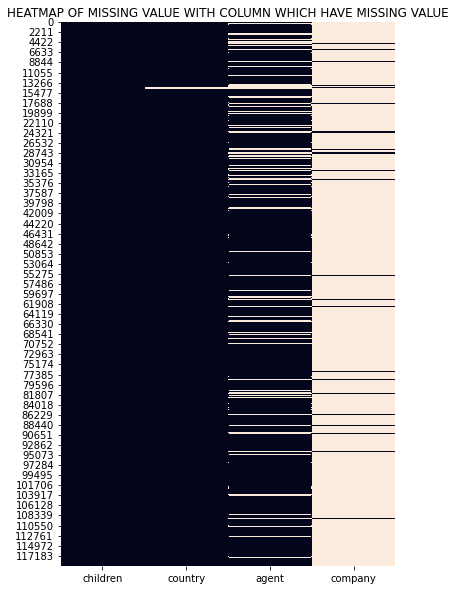

In [99]:
plt.figure(figsize = (6,10))
sns.heatmap(col_miss_v.isnull(), cbar=False)
plt.title("HEATMAP OF MISSING VALUE WITH COLUMN WHICH HAVE MISSING VALUE")
plt.show()

In [100]:
# COVERTING ALL THE NULL VALUES TO 0 IN THE DATA FARME

hbdf = hbdf.fillna(0)

In [101]:
# VERIFYING THE TOTAL NUMBERS OF NULL VALUES STILL PRESENT IN THE DATA FRAME

hbdf.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [102]:
# IN COUNTRY COLUMN REPLACING 0 WITH UNDEFINED BECAUSE COUNTRY IS A CATEGORICAL COLUMN

hbdf.country = hbdf.country.replace(0, "undefined")

In [103]:
# VERIFYING ALL THE UNIQUE IN COUNTRY COLUMN

hbdf.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'undefined', 'ROU',
       'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC',
       'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA',
       'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX',
       'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR',
       'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE',
       'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG',
       'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL',
       'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK',
       'IDN', 'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA',
       'DOM', 'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH',
       'MUS', 'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP',
       'BDI', 'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI',
       'ECU', 'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN',
       'DJI', 'STP', '

**--> DATA CLEANING IS COMPLETED HERE!**

## **EXPLORATORY DATA ANALYSIS**

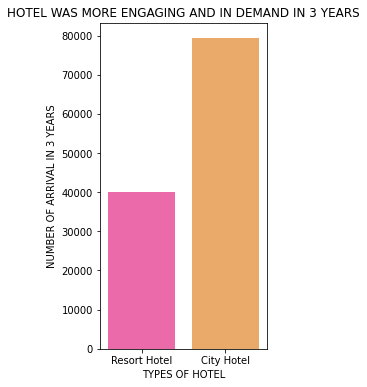

In [104]:
# HOTEL WAS MORE ENGAGING AND IN DEMAND IN 3 YEARS

plt.figure(figsize=(3,6))
sns.countplot('hotel', data= hbdf, palette="spring")
plt.xlabel("TYPES OF HOTEL")
plt.ylabel("NUMBER OF ARRIVAL IN 3 YEARS")
plt.title("HOTEL WAS MORE ENGAGING AND IN DEMAND IN 3 YEARS")
plt.show()

### **--> CITY HOTEL HAS MORE GUEST THAN RESORT HOTEL IN LAST 3 YEARS**

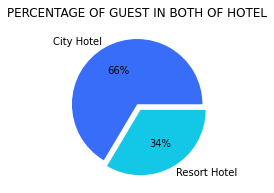

In [105]:
# PERCENTAGE OF GUEST IN BOTH OF HOTEL

plt.figure(figsize = (3,3))
index = hbdf.hotel.value_counts().index.tolist()
value = hbdf.hotel.value_counts()

palette_color = sns.color_palette('rainbow')
plt.pie(value, labels=index, colors=palette_color,explode= [0, 0.1], autopct='%.0f%%')
plt.title("PERCENTAGE OF GUEST IN BOTH OF HOTEL")
plt.show()

### **--> CITY HOTLE HAVE 66% OF GUEST AND THE REST IN RESORT HOTEL AND THAT IS 34%**

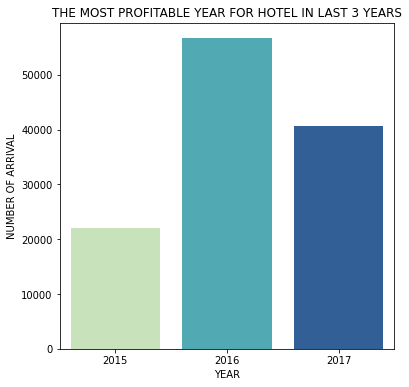

In [106]:
# WHICH YEAR IS THE MOST PROFITABLE YEAR FOR HOTEL IN LAST 3 YEARS

plt.figure(figsize=(6,6))
sns.countplot(x=hbdf['arrival_date_year'], palette='YlGnBu')
plt.xlabel("YEAR")
plt.ylabel("NUMBER OF ARRIVAL")
plt.title("THE MOST PROFITABLE YEAR FOR HOTEL IN LAST 3 YEARS")
plt.show()

## **--> 2016 IS THE MOST PROFITABLE YEAR FOR HOTEL**

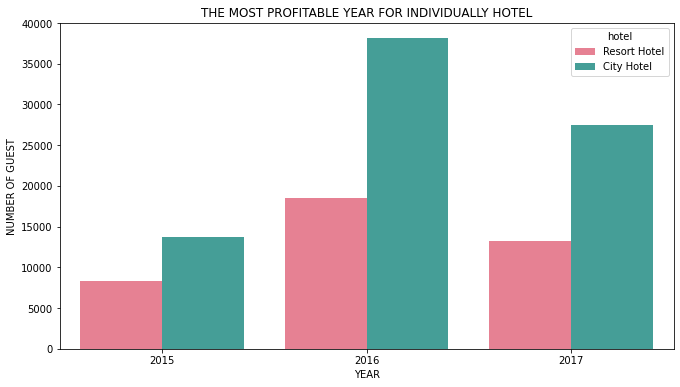

In [107]:
# THE MOST PROFITABLE YEAR FOR INDIVIDUALLY HOTEL

plt.figure(figsize=(11,6))
sns.countplot('arrival_date_year', hue = 'hotel', data= hbdf, palette="husl")
plt.xlabel("YEAR")
plt.ylabel("NUMBER OF GUEST")
plt.title("THE MOST PROFITABLE YEAR FOR INDIVIDUALLY HOTEL")
plt.show()


**--> ALL 3 YEARS CITY HOTEL HAVE MADE MORE PROFIT THAN RESORT HOTEL**

**--> 2016 IS THE MOST PROFITABLE FOR BOTH OF THE HOTEL**

**--> ALL 3 YEARS CITY HOTEL HAVE MORE NUMBER OF GUEST THAN RESORT HOTEL**

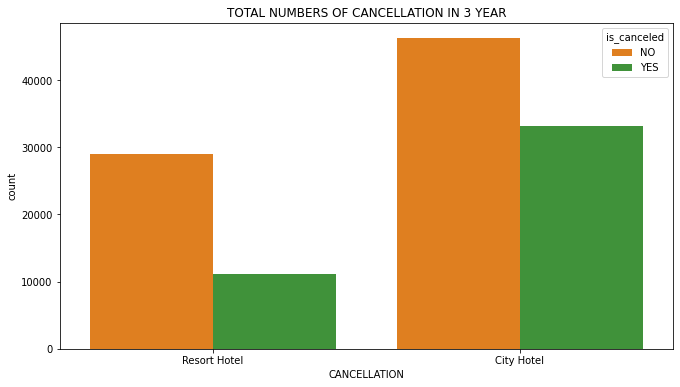

In [108]:
# TOTAL CANCELLATION OF BOOKING IN 3 YEARS


edit_hbdf = hbdf.copy() # COPING DATA SET TO MAKE CHANGES FOR BETTER UNDERSTANDING OF END USER

edit_hbdf["is_canceled"] = edit_hbdf.is_canceled.replace([0,1],["NO","YES"])


plt.figure(figsize=(11,6))
sns.countplot("hotel", hue= "is_canceled" , data = edit_hbdf, palette="Paired_r")
plt.xlabel("CANCELLATION")
plt.title("TOTAL NUMBERS OF CANCELLATION IN 3 YEAR")
plt.show()

**--> NUMBER OF BOOKING CANCELLATION IS MORE THAN 50% OF TOTAL BOOKING**

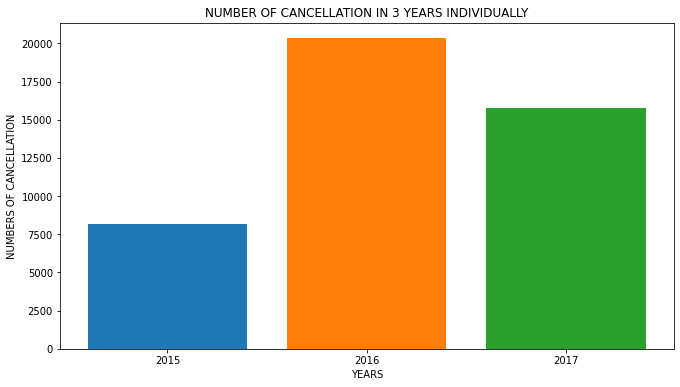

In [116]:
# CANCELLATION OF BOOKING IN 3 YEARS INDIVIDUALLY


x = ["2015", "2016", "2017"]
y = []
for i in x:
  y.append(hbdf[hbdf["arrival_date_year"] == int(i)][hbdf[hbdf["arrival_date_year"] == int(i)]["is_canceled"] == 1]["is_canceled"].count())


plt.figure(figsize=(11,6))
plt.bar(x,y, color = sns.color_palette())
plt.xlabel("YEARS")
plt.ylabel("NUMBERS OF CANCELLATION")
plt.title("NUMBER OF CANCELLATION IN 3 YEARS INDIVIDUALLY")
plt.show()

**-->2016 HAS THE HIGHEST NUMBERS OF CANCELLATION IN 3 YEARS**

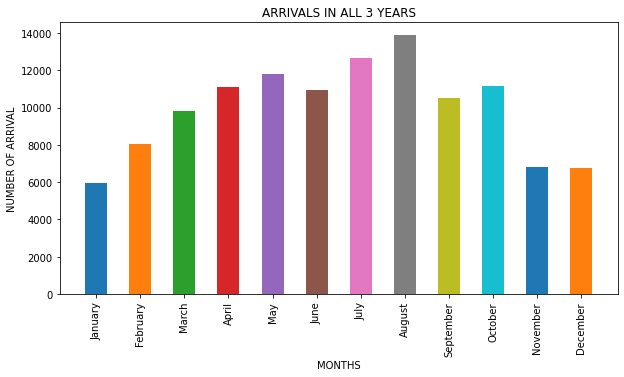

In [119]:
# WHICH MONTH HAVE THE MOST NUMBER OF GUEST IN ALL 3 YEARS (SUMMED OF ALL 3 YEAR AS PER THE MONTH)

x = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"] #COMMON FOR ALL THE TABLE
z = list(hbdf["arrival_date_month"].unique())
y = []

for i in x:
  y.append(hbdf[hbdf.arrival_date_month == i]["arrival_date_month"].count())


plt.figure(figsize=(10,5))
plt.bar(x, y, color = sns.color_palette(),
        width = 0.5)
plt.xlabel("MONTHS")
plt.xticks(rotation= "vertical")
plt.ylabel("NUMBER OF ARRIVAL")
plt.title("ARRIVALS IN ALL 3 YEARS")
plt.show()

**--> AUGUST HAVE MORE NUMBER GUEST THAN ANY OTHER MONTHS**

**--> JULY HAS THE SECOND HIGHEST NUMBER OF GUEST AFTER AUGUST**

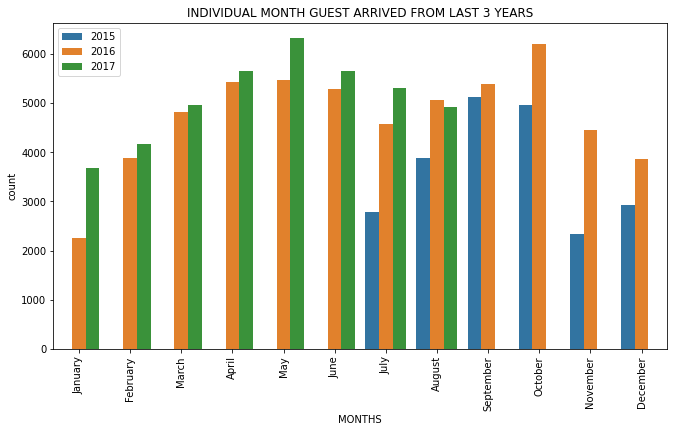

In [121]:
plt.figure(figsize= (11,6))

x = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

sns.countplot("arrival_date_month", hue="arrival_date_year", data=hbdf, order= x)
plt.xticks(rotation = "vertical")
plt.xlabel("MONTHS")
plt.title("INDIVIDUAL MONTH GUEST ARRIVED FROM LAST 3 YEARS")
plt.legend(loc="upper left")
plt.show()

**--> ONLY JULY AND AUGUST ARE IN ALL 3 YEARS THATS WHY MORE GUEST IS IN AUGUST AND JULY**

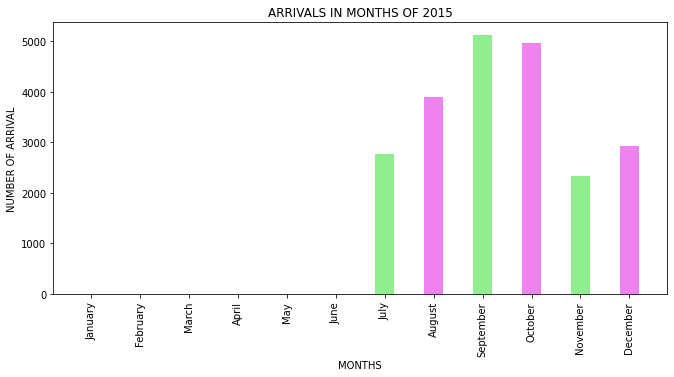

In [122]:
# WHICH MONTH HAVE THE MOST NUMBERS OF ARRIVALS IN 2015
z = list(hbdf[hbdf.arrival_date_year==2015]["arrival_date_month"].unique())
x = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
y = []

for i in x:
  if i in z:
    y.append(hbdf[hbdf["arrival_date_year"] == 2015][hbdf[hbdf["arrival_date_year"] == 2015]["arrival_date_month"] == i]["arrival_date_month"].count())
  else:
    y.append(0)

plt.figure(figsize=(11,5))
plt.bar(x, y, color =['lightgreen', 'violet'],
        width = 0.4)
plt.xlabel("MONTHS")
plt.xticks(rotation= "vertical")
plt.ylabel("NUMBER OF ARRIVAL")
plt.title("ARRIVALS IN MONTHS OF 2015")
plt.show()

**--> IN 2015, SEPTEMBER HAS THE HIGHEST NUMBERS OF ARRIVALS**

**--> IN DATASET, DATA IS FROM JULY 2015**

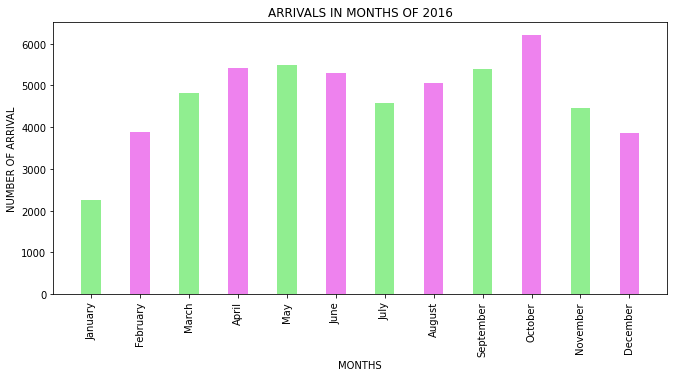

In [123]:
# WHICH MONTH HAVE THE MOST NUMBERS OF ARRIVALS IN 2016

z = list(hbdf[hbdf.arrival_date_year==2016]["arrival_date_month"].unique())
x = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
y = []

for i in x:
  if i in z:
    y.append(hbdf[hbdf["arrival_date_year"] == 2016][hbdf[hbdf["arrival_date_year"] == 2016]["arrival_date_month"] == i]["arrival_date_month"].count())
  else:
    y.append(0)


plt.figure(figsize=(11,5))
plt.bar(x, y, color =['lightgreen', 'violet'], width = 0.4)
plt.xlabel("MONTHS")
plt.xticks(rotation= "vertical")
plt.ylabel("NUMBER OF ARRIVAL")
plt.title("ARRIVALS IN MONTHS OF 2016")
plt.show()

**--> IN 2016, OCTOBER HAS THE HIGHEST NUMBERS OF ARRIVALS**

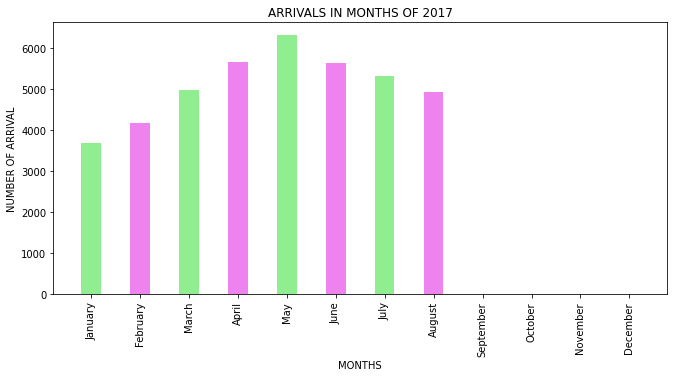

In [124]:
# WHICH MONTH HAVE THE MOST NUMBERS OF ARRIVALS IN 2017

z = list(hbdf[hbdf.arrival_date_year==2017]["arrival_date_month"].unique())
x = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
y = []

for i in x:
  if i in z:
    y.append(hbdf[hbdf["arrival_date_year"] == 2017][hbdf[hbdf["arrival_date_year"] == 2017]["arrival_date_month"] == i]["arrival_date_month"].count())
  else:
    y.append(0)

plt.figure(figsize=(11,5))
plt.bar(x, y, color =['lightgreen', 'violet'],
        width = 0.4)
plt.xlabel("MONTHS")
plt.xticks(rotation= "vertical")
plt.ylabel("NUMBER OF ARRIVAL")
plt.title("ARRIVALS IN MONTHS OF 2017")
plt.show()

**--> IN 2017, MAY HAS THE HIGHEST NUMBERS OF ARRIVALS**

**--> IN DATA SET DATA IS ONLY AVAILABLE TILL AUGUST 2017**

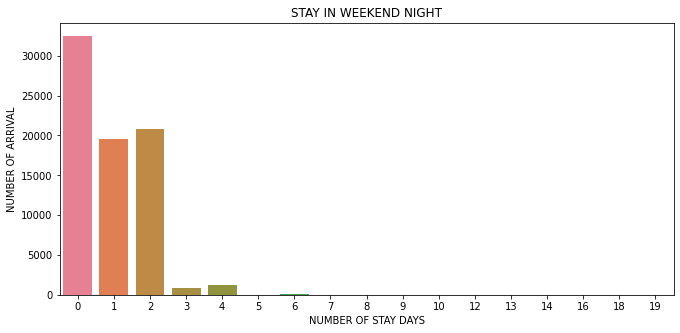

In [126]:
# STAY IN WEEKEND NIGHT

edit_hbdf = edit_hbdf[edit_hbdf["is_canceled"] != "YES"] # EDITING DATA SET IN EDIT_hBDF


plt.figure(figsize=(11,5))
sns.countplot('stays_in_weekend_nights',palette='husl', data = edit_hbdf)
plt.xlabel("NUMBER OF STAY DAYS")
plt.ylabel("NUMBER OF ARRIVAL")
plt.title("STAY IN WEEKEND NIGHT")
plt.show()